In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('train.csv')

#Basic dataframe info
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


In [3]:
#Data cleaning
df = df.drop(columns=['New_Price'])
df_cleaned = df.dropna()


#Setting all of the names to just the first word aka the make instead of the make and model
df_cleaned['Name'] = df_cleaned['Name'].str.split().str[0]
Brands = np.unique(df_cleaned['Name'])
print(Brands)

#Converting the price to USD
conversion_factor = 100000 / 1198.32
df_cleaned['Price'] = df_cleaned['Price'] * conversion_factor
Unique_prices = np.unique(df_cleaned['Price'])
print(Unique_prices)
df_cleaned = df_cleaned[df_cleaned['Price'] >= 100] #Considering any cars sold under $100 to be noise

# Removing noise from Kilometers_Driven as there is one with over 6 million
df_cleaned = df_cleaned[df_cleaned['Kilometers_Driven'] <= 1000000]

# Removing the text part (' kmpl' and ' km/kg') and converting the column to float
df_cleaned['Mileage'] = df_cleaned['Mileage'].str.replace(' kmpl', '', regex=False)
df_cleaned['Mileage'] = df_cleaned['Mileage'].str.replace(' km/kg', '', regex=False)
df_cleaned['Mileage'] = df_cleaned['Mileage'].astype(float)

#Separating engine col into int value 
df_cleaned['Engine'] = df_cleaned['Engine'].str.replace(' CC', '', regex=False)
df_cleaned['Engine'] = df_cleaned['Engine'].astype(int)

#Cleaning horsepower col to float
df_cleaned['Power'] = df_cleaned['Power'].str.replace(' bhp', '', regex=False)
df_cleaned['Power'] = df_cleaned['Power'].astype(float)

['Ambassador' 'Audi' 'BMW' 'Bentley' 'Chevrolet' 'Datsun' 'Fiat' 'Force'
 'Ford' 'Honda' 'Hyundai' 'ISUZU' 'Isuzu' 'Jaguar' 'Jeep' 'Lamborghini'
 'Land' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mini' 'Mitsubishi' 'Nissan'
 'Porsche' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']
[   36.71807197    37.5525736     41.72508178 ...  8345.01635623
 10014.01962748 13352.02616997]


C:\Users\Henry\AppData\Local\Temp\ipykernel_17112\1145310207.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Name'] = df_cleaned['Name'].str.split().str[0]
C:\Users\Henry\AppData\Local\Temp\ipykernel_17112\1145310207.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price'] = df_cleaned['Price'] * conversion_factor


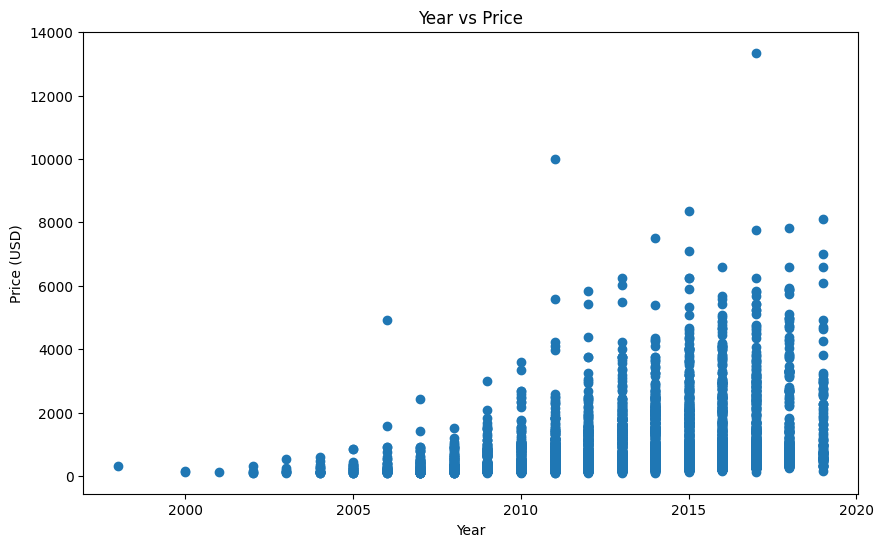

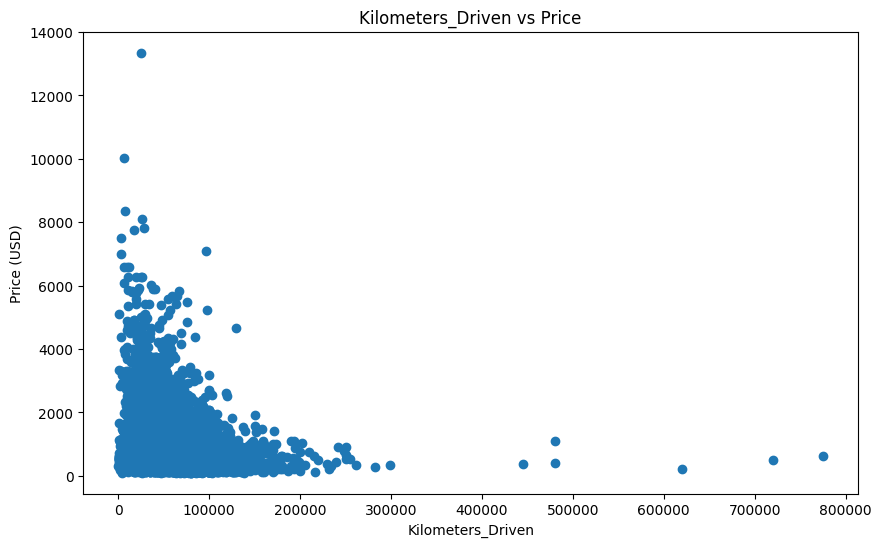

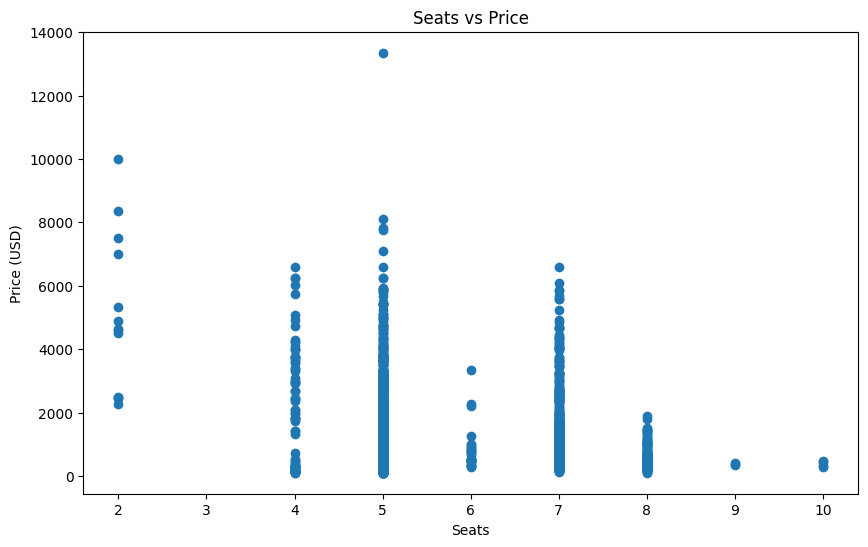

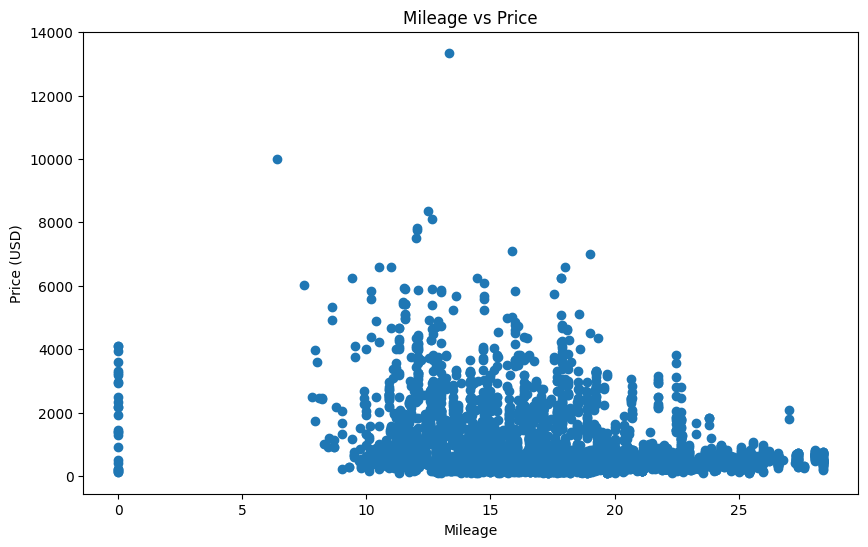

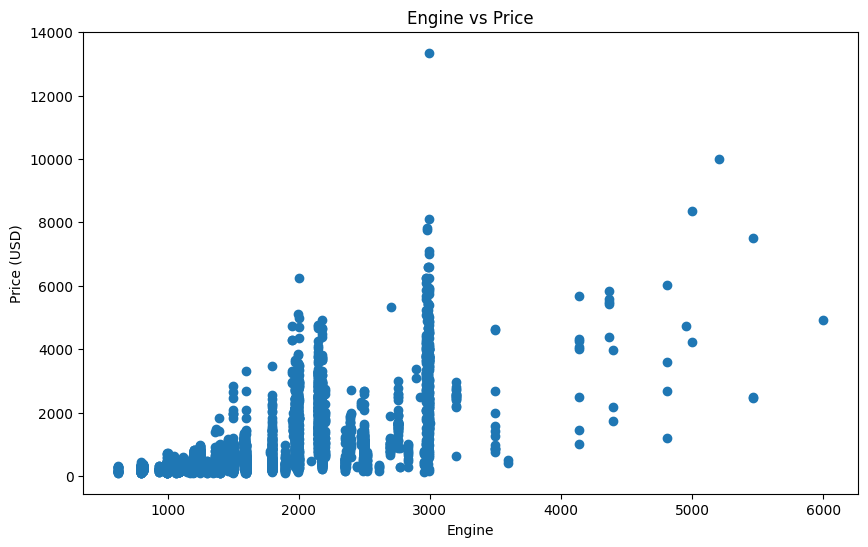

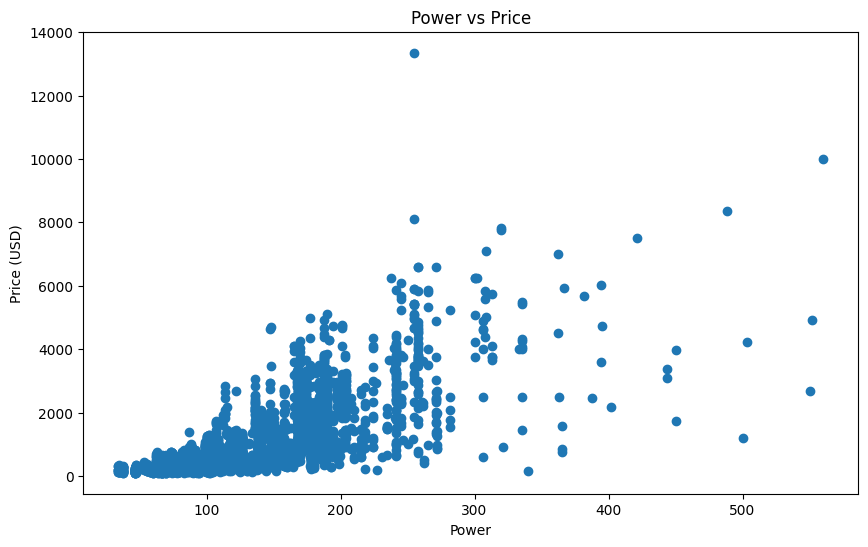

In [4]:
numerical_columns = np.array(["Year", "Kilometers_Driven", "Seats", "Mileage", "Engine", "Power"])

# Plotting each numerical feature against Price
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_cleaned[col], df_cleaned['Price'])
    plt.xlabel(col)
    plt.ylabel('Price (USD)')
    plt.title(f'{col} vs Price')
    plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

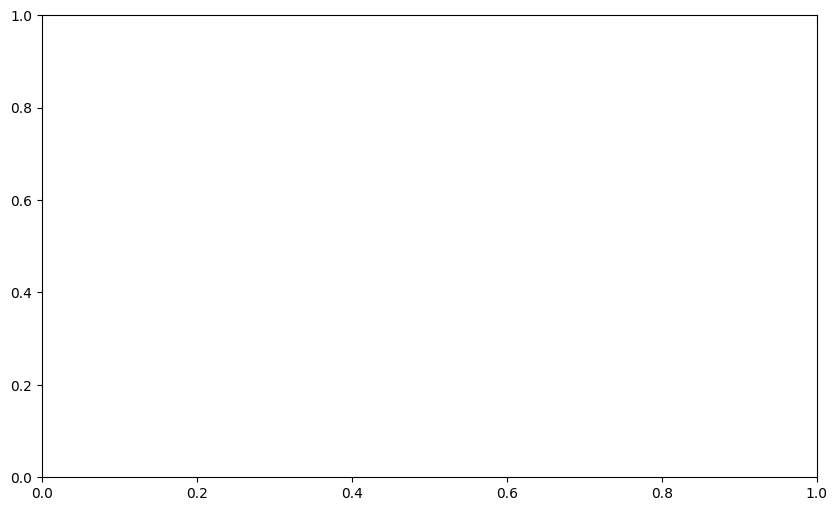

In [5]:
categorical_columns = np.array(["Location", "Name", "Fuel_Type", "Transmission", "Owner_Type"])

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting each categorical feature against Price using boxplots
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Price', data=df_cleaned)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'{col} vs Price')
    plt.xticks(rotation=45)  # This helps to prevent the x labels from overlapping
    plt.show()